In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

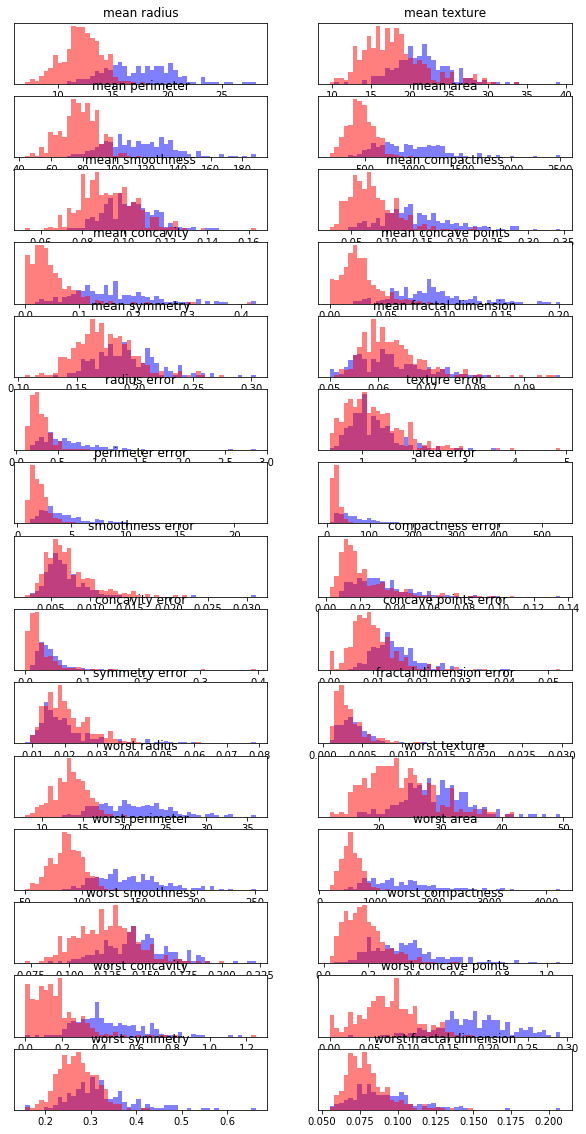

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Größe des Merkmals")

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_scaled.shape


(569, 30)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_pca.shape

(569, 2)

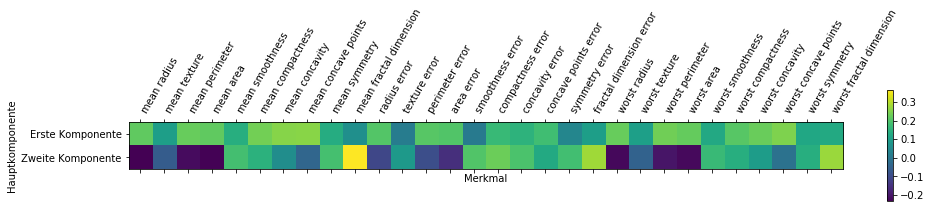

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['Erste Komponente', 'Zweite Komponente'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Merkmal")
plt.ylabel("Hauptkomponente")
